In [188]:
import scipy.integrate as sci
import numpy as np
import math
from math import pi,cos ,sin
%matplotlib inline
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

In [73]:
k=9e9 # 1/4*pi*e0



<font size="4"><b>
1D case: electric potential and electric field on x axis from -10 to +10 (0-1 excluded) are  calculated and ploted
</font></p><b><h2></h2>
<img src="img1.jpeg"  width="400" height="100">



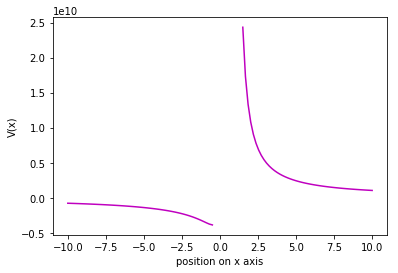

In [113]:
f=lambda x,xp: k*2*xp/(x-xp)
xp=np.linspace(0,1,100)
farray=np.vectorize(f)
x1=np.linspace(-10,-.5,50)
x2=np.linspace(1.5,10,50)
v1=[]
v2=[]
for i in x1:
    array=farray(i,xp)
    v1.append(sci.trapz(xp,array))
for j in x2:
    array=farray(j,xp)
    v2.append(sci.trapz(xp,array))

    

pyplot.plot(x1,v1,'m-',x2,v2,'m-')
pyplot.xlabel('position on x axis')
pyplot.ylabel('V(x)')



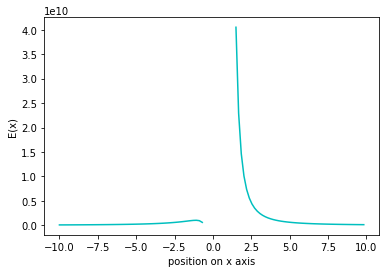

In [114]:
# Electric field
E1=-np.diff(v1)/np.diff(x1)
E2=-np.diff(v2)/np.diff(x2)
pyplot.plot(x1[0:49],E1,'c-',x2[0:49],E2,'c-')
pyplot.xlabel('position on x axis')
pyplot.ylabel('E(x)')




<font size="4"><b>
1D case: electric potential and electric field are calculated at distance d from the origin  
</font></p><b>
<h2></h2>
<img src="img2.jpeg"  width="400" height="333">



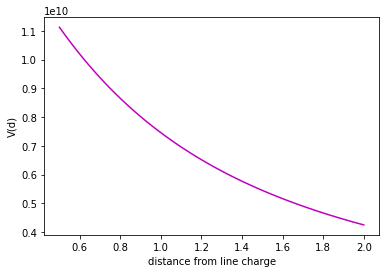

In [110]:

d=np.linspace(0.5,2,50)

v=[]

for h in d:
    f=lambda xp: k*2*xp/math.sqrt(h**2+xp**2)
    v.append(sci.romberg(f,0,1))

    

pyplot.plot(x,v,'m-')
pyplot.xlabel('distance from line charge')
pyplot.ylabel('V(d)')




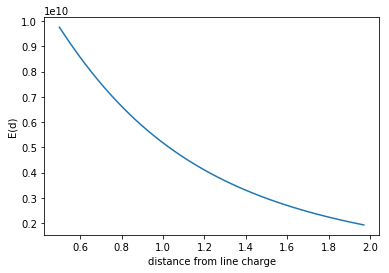

In [111]:
# Electric field
E1=-np.diff(v)/np.diff(d)

pyplot.plot(d[0:49],E1)
pyplot.xlabel('distance from line charge')
pyplot.ylabel('E(d)')





<font size="4"><b>
2D case: electric potential and electric field are calculated at point (x,y) in x-y plane. 
total poteintial is the sum of potential due to charge distribution on x axis and charge distribution on y axis.(prefactor in poteintial is set to 1 for simplicity)

</font></p><b>
<h2></h2>
<img src="img3.jpeg"  width="400" height="333">




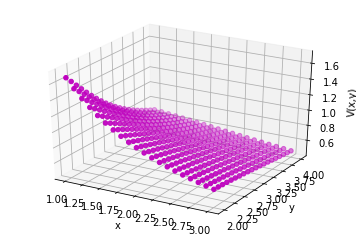

In [183]:
x=np.linspace(1,3,20)
y=np.linspace(2,4,20)
v1=np.zeros((100,100))
v2=np.zeros((100,100))
v=np.zeros((100,100))
xarray=[]
yarray=[]
varray=[]
for i in range(0,len(x)) :
    for j in range(0,len(y)) :
        f1=lambda xp: xp**2/math.sqrt((x[i]-xp)**2+(y[j]-1)**2)
        f2=lambda yp: yp/math.sqrt(x[i]**2+(y[j]-yp)**2)
        v1[i,j]=sci.romberg(f1,0,1)
        v2[i,j]=sci.romberg(f2,1,2)
        v[i,j]=v1[i,j]+v2[i,j]
    
        xarray.append(x[i])
        yarray.append(y[j])
        varray.append(v1[i,j]+v2[i,j])
        


fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xarray, yarray, varray, c='m')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V(x,y)')

pyplot.show()

#Axes3D.scatter(xs, ys, zs, zdir='z', s=20, c=None, depthshade=True)


<font size="3"><b>
As expected the potential deacreases as distance to the charge distribution increases.
</font></p><b>

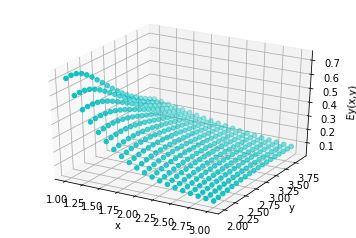

In [186]:
#elctric field : y component 

Eyarray=[]
xarray=[]
yarray=[]
for i in range(0,len(x)):
    for j in range (0,len(y)-1):
        diff=(v[i,j]-v[i,j+1])/(y[j+1]-y[j])
        Eyarray.append(diff)
        xarray.append(x[i])
        yarray.append(y[j])
        

    
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xarray, yarray, Eyarray, c='c')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Ey(x,y)')

pyplot.show()    

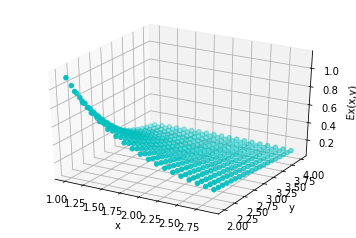

In [187]:
#elctric field : x component 

Eyarray=[]
xarray=[]
yarray=[]
for j in range(0,len(y)):
    for i in range (0,len(x)-1):
        diff=(v[i,j]-v[i+1,j])/(x[i+1]-x[i])
        Exarray.append(diff)
        xarray.append(x[i])
        yarray.append(y[j])
        

    
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xarray, yarray, Exarray, c='c')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Ex(x,y)')

pyplot.show()    

<font size="4"><b>
2D case: electric potential and electric field are calculated on a x-y plane at distance z above the disk the origin.
</font></p><b>
<h2></h2>
<img src="img3.jpeg"  width="400" height="333">



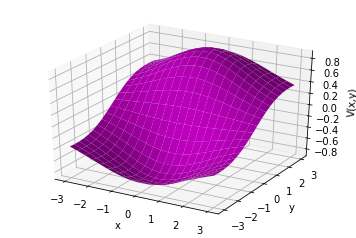

In [203]:
x=np.linspace(-3,+3,20)
y=np.linspace(-3,+3,20)
z=2
v=np.zeros((len(x),len(y)))
for i in range(0,len(x)):
    for j in range (0,len(y)):
        f=lambda r,t : cos(t)*r**2/math.sqrt((x[i]-r*cos(t))**2 + (y[j]-r*sin(t))**2 + z**2 )
        integral=sci.nquad(f,[[0,2],[0,2*pi]])
        v[i,j]=integral[0]    

fig = pyplot.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, v,shade=True,color='m')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V(x,y)')




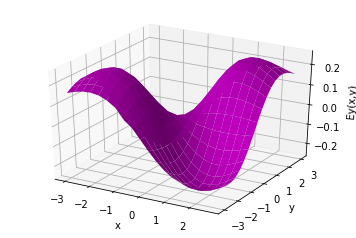

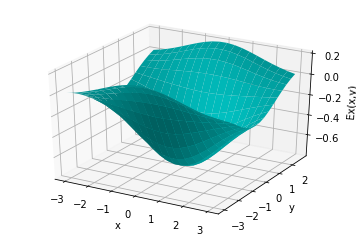

In [218]:
# electric field
Ey=-np.diff(v,axis=-1)/.3
Ex=-np.diff(v,axis=0)/.3

fig1 = pyplot.figure()
ax1 = fig1.gca(projection='3d')

X, Y = np.meshgrid(x[0:19], y)
surf = ax1.plot_surface(X, Y, Ey,shade=True,color='m')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('Ey(x,y)')

fig2 = pyplot.figure()
ax2 = fig2.gca(projection='3d')
X, Y = np.meshgrid(x, y[0:19])
surf = ax2.plot_surface(X, Y, Ex,shade=True,color='c')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('Ex(x,y)')


